In [1]:
import os
import sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD
from common.trainer import Trainer

ネットワークの種類  
1. Normal  
2. Weight decay  
3. Dropout  
4. Weight decay and Dropout   

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

In [3]:
networks = {'Normal': None, 'WeightDecay': None, 'Dropout': None, 'WeightDecay-Dropout': None}
params_dropout = [0, 0.0, 0.2, 0.2]
params_weight_decay = [0, 0.1, 0, 0.1]

train_acc_dict = {}
test_acc_dict = {}

for idx, key in enumerate(networks):
    weight_decay_lambda = params_weight_decay[idx]
    dropout_ration = params_dropout[idx]
    use_dropout = (dropout_ration != 0)
    networks[key] = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10, weight_decay_lambda=weight_decay_lambda, use_dropout=use_dropout, dropout_ration=dropout_ration)

    trainer = Trainer(networks[key], x_train, t_train, x_test, t_test, epochs=300, mini_batch_size=100, optimizer='SGD', optimizer_param={'lr': 0.01}, verbose=False)
    trainer.train()

    train_acc_dict[key] = trainer.train_acc_list
    test_acc_dict[key] = trainer.test_acc_list

In [4]:
def plot_graph():
    plt.figure(figsize=(10, 10))
    markers = {'train': 'o', 'test': 's'}
    index = 1
    for key in networks:
        plt.subplot(2, 2, index)
        plt.title(key)
        x = np.arange(len(train_acc_dict[key]))
        plt.plot(x, train_acc_dict[key], marker='o', label='train', markevery=10)
        plt.plot(x, test_acc_dict[key], marker='s', label='test', markevery=10)
        plt.xlabel("epochs")
        plt.ylabel("accuracy")
        plt.ylim(0, 1.0)
        plt.legend(loc='lower right')
        index += 1

    plt.show()

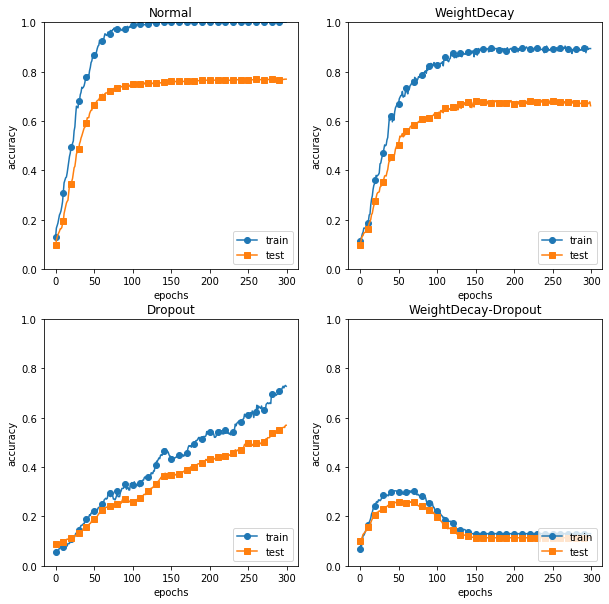

In [5]:
plot_graph()